In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load dataset 
df = pd.read_csv("data.csv")

In [3]:
# Remove unnecessary columns
df = df.drop(columns=["id", "Unnamed: 32"], errors='ignore')

In [4]:
print(df.head())
print("\nDataset shape:", df.shape)
print("\nClass distribution:\n", df["diagnosis"].value_counts())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33 

In [5]:
# Encode categorical target
df["diagnosis"] = df["diagnosis"].map({"M":1, "B":0})  # M = Malignant(1), B = Benign(0)

In [9]:
#Split Data
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [10]:
# Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
#Train Model — Decision Tree
model = DecisionTreeClassifier(max_depth=4, random_state=42) # smaller depth = generalized / low variance
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [12]:
# Predictions
y_pred = model.predict(X_test)

In [14]:
#  Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Evaluation:")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)


Model Evaluation:
Accuracy: 0.9122807017543859
Precision: 0.9444444444444444
Recall: 0.8095238095238095
F1 Score: 0.8717948717948718


In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[70  2]
 [ 8 34]]


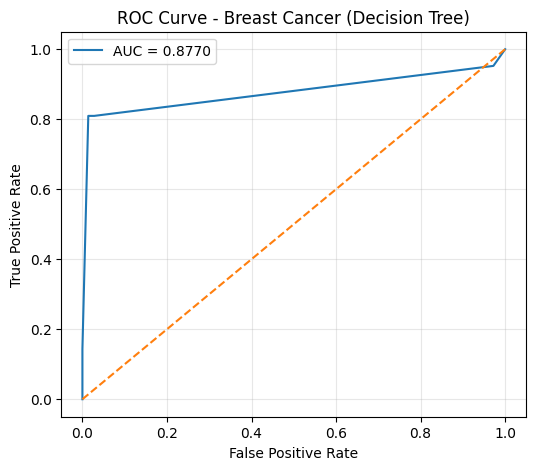

In [16]:
# ROC Curve + AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Breast Cancer (Decision Tree)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [17]:
# Cross Validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("\nCross-Validation Accuracy:", cv_scores.mean(), " | Scores:", cv_scores)


Cross-Validation Accuracy: 0.9208818506443098  | Scores: [0.92105263 0.89473684 0.93859649 0.94736842 0.90265487]


In [18]:
# Bias–Variance Experiment (Compare Complex vs Simple Tree)
simple_tree = DecisionTreeClassifier(max_depth=2, random_state=42)
complex_tree = DecisionTreeClassifier(max_depth=None, random_state=42)

simple_scores = cross_val_score(simple_tree, X, y, cv=5)
complex_scores = cross_val_score(complex_tree, X, y, cv=5)

print("\nBias–Variance Check:")
print("Simple Tree Avg Accuracy:", simple_scores.mean())
print("Complex Tree Avg Accuracy:", complex_scores.mean())


Bias–Variance Check:
Simple Tree Avg Accuracy: 0.9279614966620089
Complex Tree Avg Accuracy: 0.9173420276354604
